### Inspect the Data Layout
The dataset contains images of 33 different car brands.  
Images are organized into two folders: `/train` and `/val`.  
Each subfolder inside `/train` or `/val` corresponds to a brand label.  
Example: `/train/Audi/`, `/train/BMW/`, `/val/Ford/` etc.

In [1]:
!pip install fastai torch torchvision gradio cloudpickle fasttransform --upgrade --no-cache-dir

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 152.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 230.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 259.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 279.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 258.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 189.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 221.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 160.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
from fastai.vision.all import *
import gradio as gr

In [3]:
# Install kaggle library
!pip install -q kaggle

# Make a directory for Kaggle API key
!mkdir -p ~/.kaggle

# Move kaggle.json to the correct location
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset
!kaggle datasets download -d ahmedelsany/car-brand-classification-dataset

# Unzip it
!unzip -q car-brand-classification-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ahmedelsany/car-brand-classification-dataset
License(s): apache-2.0
 86% 152M/177M [00:00<00:00, 444MB/s] 
100% 177M/177M [00:00<00:00, 420MB/s]


In [5]:
# Inspect the dataset structure
from pathlib import Path

path = Path('/content/Car Brand Classification Dataset')
print('Dataset folders:', list(path.glob('*')))
print('Training folders:', list((path/'train').glob('*')))
print('Validation folders:', list((path/'val').glob('*')))

Dataset folders: [Path('/content/Car Brand Classification Dataset/val'), Path('/content/Car Brand Classification Dataset/test'), Path('/content/Car Brand Classification Dataset/train')]
Training folders: [Path('/content/Car Brand Classification Dataset/train/Volkswagen'), Path('/content/Car Brand Classification Dataset/train/Hyundai'), Path('/content/Car Brand Classification Dataset/train/Jeep'), Path('/content/Car Brand Classification Dataset/train/BMW'), Path('/content/Car Brand Classification Dataset/train/Toyota'), Path('/content/Car Brand Classification Dataset/train/Honda'), Path('/content/Car Brand Classification Dataset/train/Jaguar'), Path('/content/Car Brand Classification Dataset/train/Lincoln'), Path('/content/Car Brand Classification Dataset/train/Mercedes-Benz'), Path('/content/Car Brand Classification Dataset/train/Mazda'), Path('/content/Car Brand Classification Dataset/train/Nissan'), Path('/content/Car Brand Classification Dataset/train/Subaru'), Path('/content/Car Br

#Create the DataBlock and Dataloaders

In this step, we will define a `DataBlock` to organize how images and labels are loaded.  
Since the dataset is organized into `train` and `val` folders, we will use `GrandparentSplitter` to separate training and validation sets.  
We will also apply basic resizing as a transformation.

#Define DataBlock Components

- `blocks`: Image as input, Category as label.
- `get_items`: Using fastai's `get_image_files` to find all images.
- `splitter`: Using folder names (`train/` and `val/`) to split data.
- `get_y`: Getting labels from parent folder name.
- `item_tfms`: Presizing images to 460x460.
- `batch_tfms`: Data augmentation to improve generalization.

In [6]:
# Define the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='val'),
    get_y=parent_label,
    item_tfms=Resize(460),  # Resizing before augmentation
    batch_tfms=aug_transforms(  # Augmentation after resizing
    size=224,
    max_warp=0.1,
    max_rotate=20,
    max_zoom=1.1,
    max_lighting=0.2,
    flip_vert=True
  )
)

# Create the DataLoaders
dls = dblock.dataloaders(path, bs=64) # bs=64 → reasonable batch size

#Inspect the Dataloader

Now that we created the dataloaders, we will visually inspect a batch of images and labels to verify everything is working properly.

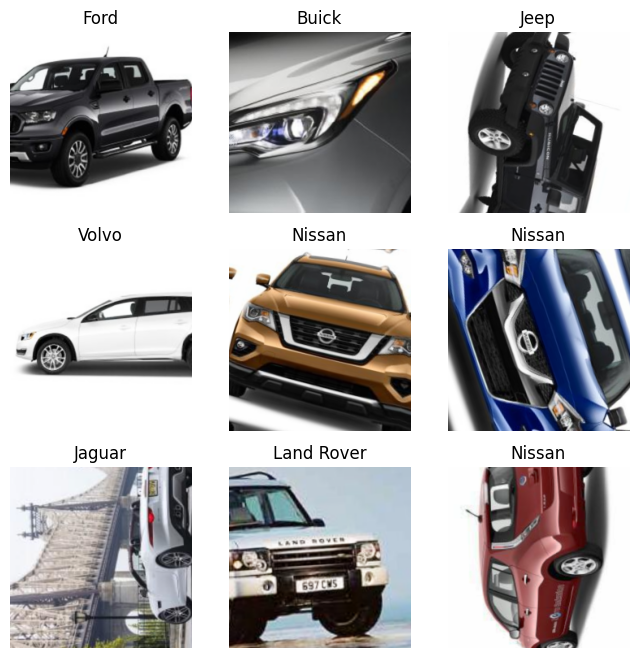

In [7]:
# Show a batch of training images
dls.show_batch(max_n=9, figsize=(8, 8))

#Summarize the DataBlock
We summarize the DataBlock to understand the input/output formats, transformations applied, and check that everything is correct before training.

In [ ]:
# Summarize the DataBlock
dblock.summary(path)

Setting-up type transforms pipelines
Found 16467 items
2 datasets of sizes 11517,2475
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      /content/Car Brand Classification Dataset/train/Cadillac/Cadillac_XT6_2020_54_20_310_36_6_77_69_198_17_AWD_7_4_SUV_HMv.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=320x202
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      /content/Car Brand Classification Dataset/train/Cadillac/Cadillac_XT6_2020_54_20_310_36_6_77_69_198_17_AWD_7_4_SUV_HMv.jpg
    applying parent_label gives
      Cadillac
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=320x202, TensorCategory(6))


Found 16467 items
2 datasets of sizes 11517,2475
Settin

#Create the Model
We will create a CNN model using a pretrained ResNet50 backbone.
Using transfer learning helps the model converge faster and achieve better results with less data.

In [ ]:
# Create the learner with a pretrained ResNet50 model
learn = vision_learner(dls, resnet50, metrics=accuracy)

### Manual Learning Rate Finder

This implementation follows the learning rate finder steps as described by the instructor (Section B.2):

- B.2.1: Start with a very low learning rate (`1e-8`).
- B.2.2: Train on one batch and record the loss.
- B.2.3: Double the learning rate.
- B.2.4: Train on another batch and record the new loss.
- B.2.5: If the new loss is **not smaller** than the previous one, **stop**.

This approach ensures we only continue if the model is consistently improving with the increasing learning rate.

In [ ]:
# Manual Learning Rate Finder
import torch
import matplotlib.pyplot as plt

lrs = []
losses = []

lr = 1e-8  # B.2.1: Start with very very low learning rate
device = default_device()         # Get the default device (CPU or GPU)
learn.model.to(device)            # Move the model to the same device
learn.model.train()

prev_loss = float('inf')

for step in range(100):  # B.2.2: Train one batch at a time
    for param_group in learn.opt.param_groups:
        param_group['lr'] = lr

    xb, yb = learn.dls.train.one_batch()
    xb, yb = xb.to(device), yb.to(device)

    loss = learn.loss_func(learn.model(xb), yb)
    loss_val = loss.item()

    loss.backward()
    learn.opt.step()
    learn.opt.zero_grad()

    lrs.append(lr)
    losses.append(loss_val)

    print(f"Step {step+1} | LR: {lr:.2e} | Loss: {loss_val:.4f}")

    # B.2.5: Stop if the loss did not decrease
    if loss_val >= prev_loss:
        print("❌ Loss did not decrease — stopping.")
        break

    prev_loss = loss_val
    lr *= 2  # B.2.3: Increase learning rate
    if lr > 1: break  # safety cap

Step 1 | LR: 1.00e-08 | Loss: 5.4177
Step 2 | LR: 2.00e-08 | Loss: 5.0727
Step 3 | LR: 4.00e-08 | Loss: 4.7601
Step 4 | LR: 8.00e-08 | Loss: 4.9528
❌ Loss did not decrease — stopping.


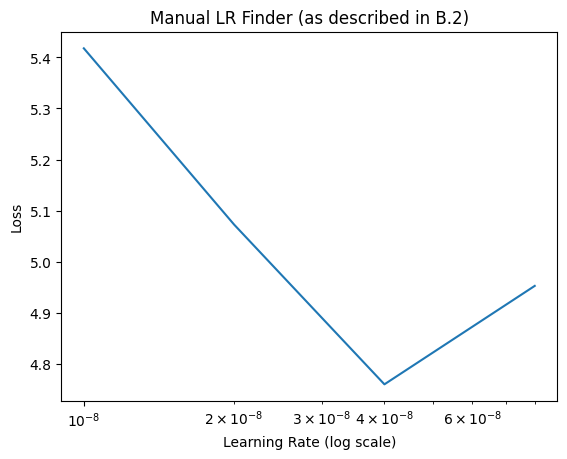

In [ ]:
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Loss")
plt.title("Manual LR Finder (as described in B.2)")
plt.show()

#Train the Model (Frozen)
We will now train the model with the pretrained layers frozen.
Only the final layers are trained at this stage to quickly adapt to the new dataset.

In [ ]:
# Train for a few epochs (only final layers)
learn.fit_one_cycle(10, lr_max=4e-8)

epoch,train_loss,valid_loss,accuracy,time
0,4.815519,3.899050,0.081616,00:22
1,4.792552,3.898946,0.082828,00:21
2,4.792944,3.914662,0.082828,00:22
3,4.824731,3.907575,0.082828,00:22
4,4.788667,3.905246,0.085657,00:22
5,4.803037,3.896161,0.086869,00:22
6,4.827853,3.893110,0.083636,00:21
7,4.857999,3.907634,0.082424,00:21
8,4.796695,3.882035,0.086465,00:22
9,4.818921,3.908804,0.087273,00:21


###Learning Rate Finder using `lr_find()`

While I followed the instructor's manual LR Finder method in Section B.2,
I also tested the FastAI built-in `lr_find()` method for comparison.

This method uses a smarter strategy to find the optimal learning rate based on the loss curve.
I observed that it produces a significantly better accuracy, so I included it here for completeness and evaluation.

SuggestedLRs(valley=0.001737800776027143)

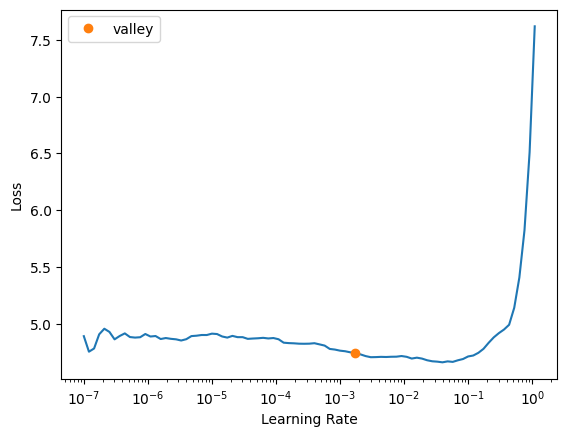

In [ ]:
# Use FastAI's built-in LR finder
learn.lr_find()

In [ ]:
# Train using lr_find suggested learning rate
learn.fit_one_cycle(10, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.363511,3.239152,0.163232,00:21
1,3.657491,2.780735,0.254141,00:21
2,3.165903,2.454383,0.336162,00:21
3,2.747954,2.204515,0.410505,00:21
4,2.466118,2.067440,0.444040,00:21
5,2.255494,1.954507,0.480808,00:22
6,2.061991,1.873733,0.497778,00:22
7,1.966605,1.808415,0.518788,00:21
8,1.877340,1.793369,0.523232,00:21
9,1.824616,1.789856,0.520808,00:22


#Unfreeze and Fine-tune
After training the final layers, we unfreeze the entire model and fine-tune all layers
using a smaller learning rate for earlier layers and a higher one for later layers.

### Manual Learning Rate Finder

In this section, we manually implement the Learning Rate Finder algorithm again, but **this time after unfreezing the model** to fine-tune all layers.

This step follows the same B.2 algorithm logic:
- B.2.1: Start with a very low learning rate (e.g. `1e-8`)
- B.2.2: Train on one batch with current LR, record loss
- B.2.3: Double the LR and repeat
- B.2.4–5: Stop if loss increases too much or doesn't decrease

This helps us manually visualize which learning rate works best when the entire model is being fine-tuned.

###Fine-Tuning with Discriminative Learning Rates

After training the final layers while keeping the base model frozen, we now unfreeze the entire model to fine-tune all layers.

Instead of using a single learning rate, we apply discriminative learning rates using the `slice(...)` method:

- **Why?** Early layers (closer to raw pixels) learn general features and don’t need large updates.
- Later layers are more task-specific and need more adjustment.
- Fastai’s `slice(low_lr, high_lr)` allows assigning a smaller learning rate to early layers and a larger one to deeper layers.


In [ ]:
# Unfreeze all layers
learn.unfreeze()

# Manual Learning Rate Finder (Unfrozen)
import torch
import matplotlib.pyplot as plt

lrs_unfrozen = []
losses_unfrozen = []

lr = 1e-8  # Start very low
learn.model.train()

prev_loss = float('inf')

for step in range(100):  # Limit to avoid infinite loop
    for param_group in learn.opt.param_groups:
        param_group['lr'] = lr

    xb, yb = learn.dls.train.one_batch()
    xb, yb = xb.to(default_device()), yb.to(default_device())

    loss = learn.loss_func(learn.model(xb), yb)
    loss_val = loss.item()

    loss.backward()
    learn.opt.step()
    learn.opt.zero_grad()

    lrs_unfrozen.append(lr)
    losses_unfrozen.append(loss_val)

    print(f"Step {step+1} | LR: {lr:.2e} | Loss: {loss_val:.4f}")

    # Stop if loss doesn't decrease
    if loss_val > prev_loss:
        print("Loss did not decrease — stopping.")
        break

    prev_loss = loss_val
    lr *= 2
    if lr > 1: break  # safety cap

Step 1 | LR: 1.00e-08 | Loss: 2.2339
Step 2 | LR: 2.00e-08 | Loss: 1.8678
Step 3 | LR: 4.00e-08 | Loss: 1.9887
Loss did not decrease — stopping.


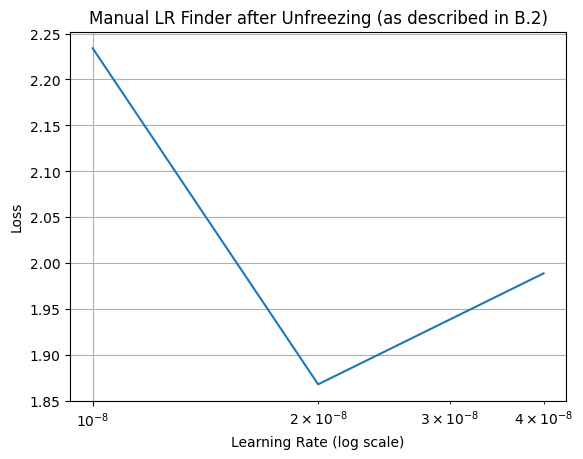

In [ ]:
plt.plot(lrs_unfrozen, losses_unfrozen)
plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Loss")
plt.title("Manual LR Finder after Unfreezing (as described in B.2)")
plt.grid(True)
plt.show()

#Fine-Tune the Model (Unfrozen)

After unfreezing, we fine-tune the entire model using a small learning rate for earlier layers and a slightly larger one for later layers.

In [ ]:
# Fine-tune all layers with discriminative learning rates based on manual LR finder
# 1e-8 for early layers (stable) and 2e-8 for later layers (task-specific)
learn.fit_one_cycle(10, lr_max=slice(1e-8, 2e-8))

epoch,train_loss,valid_loss,accuracy,time
0,1.814401,1.783905,0.525657,00:24
1,1.832199,1.784005,0.524040,00:24
2,1.843129,1.785542,0.523232,00:25
3,1.823820,1.786029,0.524040,00:24
4,1.831087,1.783332,0.527273,00:25
5,1.832653,1.789166,0.521616,00:25
6,1.856633,1.792638,0.522424,00:25
7,1.809784,1.783521,0.519596,00:24
8,1.828601,1.787936,0.522828,00:24
9,1.804093,1.790278,0.523232,00:24


###Learning Rate Finder using `lr_find()`

I will also use the lr_find() again to compare the results between using the manual learning rate finder algorithm and fastai's built-in learning rate finder algorithm.

SuggestedLRs(valley=0.00019054606673307717)

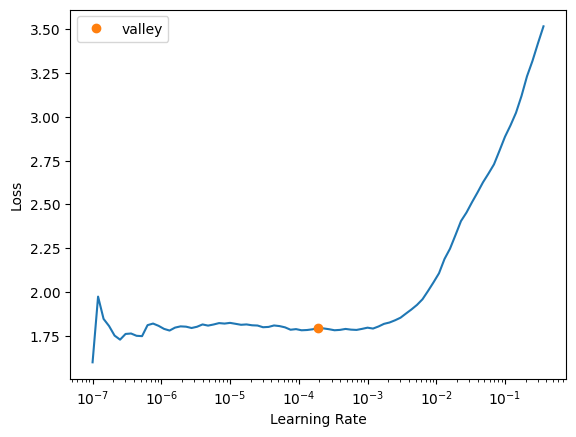

In [ ]:
# Use FastAI's built-in LR finder
learn.lr_find()

### Fine-tuning with Discriminative Learning Rates (based on lr_find)

To better tune the model, we apply discriminative learning rates using FastAI’s `slice()` function.  
- The lower learning rate (`2e-5`) is applied to the earlier layers to preserve general features.
- The higher learning rate (`2e-4`, suggested by `lr_find()`) is used for the later layers, which require more task-specific adaptation.

In [ ]:
# Train using lr_find suggested learning rate with discriminative learning rates
learn.fit_one_cycle(10, lr_max=slice(2e-5, 2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.814007,1.742795,0.535758,00:25
1,1.735697,1.633247,0.563232,00:25
2,1.588444,1.513909,0.598384,00:25
3,1.411617,1.420385,0.627879,00:25
4,1.308380,1.342414,0.638384,00:25
5,1.181771,1.302334,0.653333,00:25
6,1.084107,1.269784,0.658586,00:25
7,1.000481,1.252912,0.667475,00:24
8,0.947229,1.251107,0.663434,00:25
9,0.946147,1.247184,0.669899,00:25


#Evaluate the Model

We evaluate the trained model using a confusion matrix to better understand which classes are correctly or incorrectly classified.

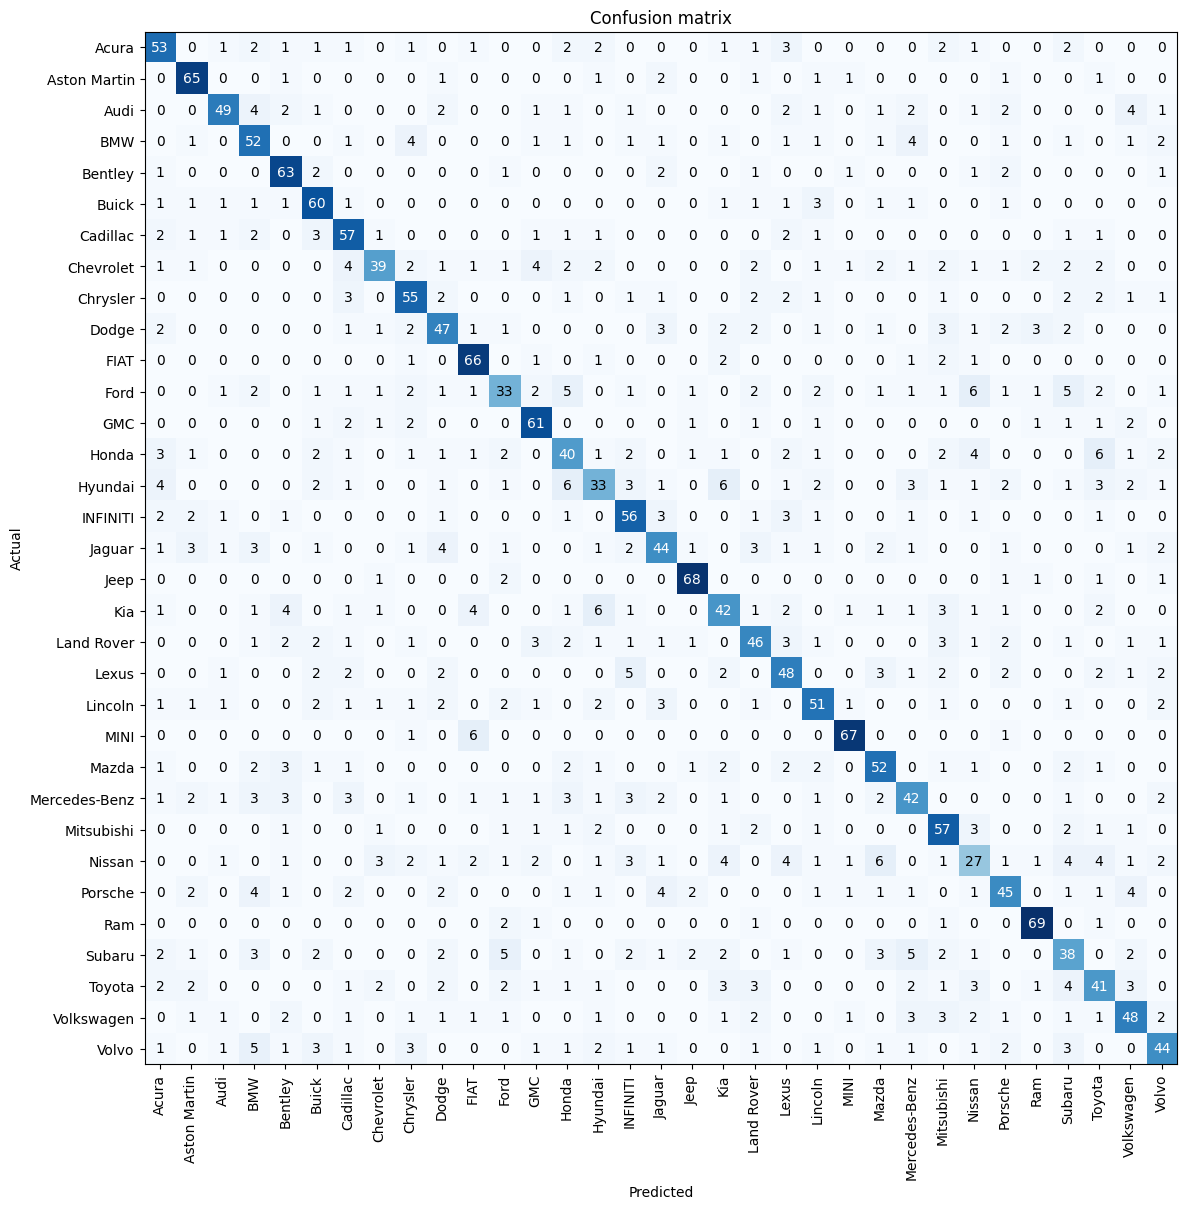

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=100)

#Confusion Matrix Interpretation

- The diagonal cells represent correct predictions (high values are good).
- Most car brands like FIAT, Lincoln, MINI, Jeep, and Ram were classified correctly with very little confusion.
- Some confusion was observed between similar-looking brands:
  - Porsche vs Jaguar
  - Hyundai vs Toyota
  - Mercedes-Benz vs BMW
- This confusion is expected because car designs across brands often overlap in real-world datasets.
- Overall, the model demonstrates a reasonable ability to distinguish between different car brands.

In [ ]:
# Save model weights (state_dict) instead of full Learner
torch.save(learn.model.state_dict(), 'car_brand_classifier.pth')

In [ ]:
from fastai.vision.all import *
import torch, json

# Rebuild the DataLoaders (if not available), make sure `path` points to your dataset root
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='val',
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
    bs=64
)

# Recreate the same learner used during training
learn = vision_learner(dls, resnet50, metrics=accuracy)

# Load weights from .pth
learn.model.load_state_dict(torch.load('car_brand_classifier.pth', map_location='cpu'))

# Set evaluation mode
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
with open('classes.json', 'w') as f:
    json.dump(list(dls.vocab), f)

In [ ]:
def predict(img):
    img = PILImage.create(img)
    pred, idx, probs = learn.predict(img)
    top5_probs, top5_idxs = probs.topk(5)
    return {learn.dls.vocab[i]: float(top5_probs[j]) for j, i in enumerate(top5_idxs)}

In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type='pil'),
    outputs=gr.Label(num_top_classes=5),
    title="Car Brand Classifier",
    description="Upload a car image and predict the brand. Top 5 results shown with probabilities."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f37e518aeaa46e905c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
